In [19]:
!pip install pycryptodome


In [20]:
import time
import matplotlib.pyplot as plt
from Crypto.Cipher import AES, PKCS1_OAEP
from Crypto.PublicKey import RSA
from Crypto.Hash import SHA256
from Crypto.Signature import pkcs1_15
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad


In [21]:
def create_aes_key(bits):
    aes_key = get_random_bytes(bits // 8)
    with open(f'aes_key_{bits}.bin', 'wb') as key_file:
        key_file.write(aes_key)
    return aes_key

def create_rsa_keys(bits):
    rsa_key = RSA.generate(bits)
    private_key = rsa_key.export_key()
    public_key = rsa_key.publickey().export_key()
    with open(f'rsa_private_key_{bits}.pem', 'wb') as prv_file:
        prv_file.write(private_key)
    with open(f'rsa_public_key_{bits}.pem', 'wb') as pub_file:
        pub_file.write(public_key)
    return private_key, public_key

# Example usage
aes_key_128 = create_aes_key(128)
rsa_priv_key, rsa_pub_key = create_rsa_keys(2048)


In [22]:
def aes_encrypt(data, key, mode):
    aes_cipher = AES.new(key, mode)
    encrypted_data = aes_cipher.encrypt(pad(data, AES.block_size))
    return encrypted_data

def aes_decrypt(encrypted_data, key, mode):
    aes_cipher = AES.new(key, mode)
    decrypted_data = unpad(aes_cipher.decrypt(encrypted_data), AES.block_size)
    return decrypted_data

# Example usage
data = b"Sample encryption data"
cipher_data = aes_encrypt(data, aes_key_128, AES.MODE_ECB)
plain_data = aes_decrypt(cipher_data, aes_key_128, AES.MODE_ECB)
print(plain_data)


b'Sample encryption data'


In [23]:
def rsa_encrypt(data, pub_key):
    rsa_cipher = PKCS1_OAEP.new(RSA.import_key(pub_key))
    encrypted_data = rsa_cipher.encrypt(data)
    return encrypted_data

def rsa_decrypt(encrypted_data, priv_key):
    rsa_cipher = PKCS1_OAEP.new(RSA.import_key(priv_key))
    decrypted_data = rsa_cipher.decrypt(encrypted_data)
    return decrypted_data

# Example usage
cipher_data = rsa_encrypt(data, rsa_pub_key)
plain_data = rsa_decrypt(cipher_data, rsa_priv_key)
print(plain_data)


b'Sample encryption data'


In [24]:
def rsa_sign(data, priv_key):
    rsa_key = RSA.import_key(priv_key)
    hash_data = SHA256.new(data)
    signature = pkcs1_15.new(rsa_key).sign(hash_data)
    return signature

def rsa_verify(data, signature, pub_key):
    rsa_key = RSA.import_key(pub_key)
    hash_data = SHA256.new(data)
    try:
        pkcs1_15.new(rsa_key).verify(hash_data, signature)
        return True
    except (ValueError, TypeError):
        return False

# Example usage
signature = rsa_sign(data, rsa_priv_key)
print(rsa_verify(data, signature, rsa_pub_key))


True


In [25]:
def sha256_hash(data):
    hash_obj = SHA256.new()
    hash_obj.update(data)
    return hash_obj.hexdigest()

# Example usage
print(sha256_hash(data))


7f15e1c8aef5353261c8c5ea2da2749a6d57decd968ccfdf5bf7c51e06f739c5


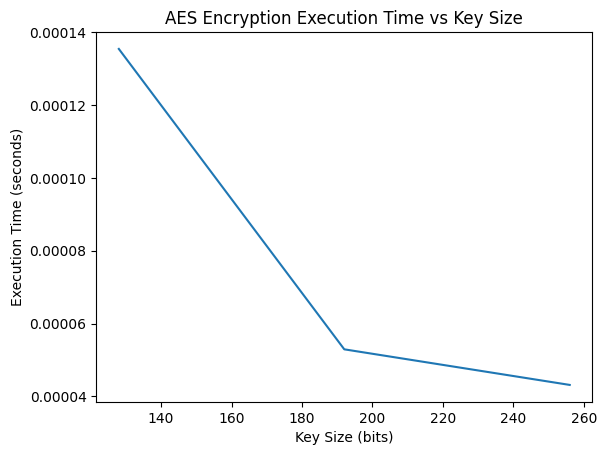

In [26]:
def measure_exec_time(func, *args):
    start = time.time()
    result = func(*args)
    end = time.time()
    exec_time = end - start
    return exec_time, result

# Valid AES key sizes: 128 bits (16 bytes), 192 bits (24 bytes), and 256 bits (32 bytes)
aes_key_sizes = [16, 24, 32]
exec_times = []

for key_size in aes_key_sizes:
    aes_key = create_aes_key(key_size * 8)
    exec_time, _ = measure_exec_time(aes_encrypt, data, aes_key, AES.MODE_ECB)
    exec_times.append(exec_time)

plt.plot([size * 8 for size in aes_key_sizes], exec_times)
plt.xlabel('Key Size (bits)')
plt.ylabel('Execution Time (seconds)')
plt.title('AES Encryption Execution Time vs Key Size')
plt.show()


In [27]:
def main():
    while True:
        print("\nSelect a cryptographic operation:")
        print("1. AES Encryption/Decryption")
        print("2. RSA Encryption/Decryption")
        print("3. RSA Signature")
        print("4. SHA-256 Hashing")
        print("5. Exit")

        option = input("Enter your choice: ")

        if option == '1':
            mode = AES.MODE_ECB if input("Choose mode (ECB/CFB): ").upper() == 'ECB' else AES.MODE_CFB
            key_size = int(input("Enter AES key size (128/256): "))
            aes_key = create_aes_key(key_size)
            data = input("Enter data to encrypt: ").encode()
            encrypted = aes_encrypt(data, aes_key, mode)
            print(f"Encrypted data: {encrypted}")
            decrypted = aes_decrypt(encrypted, aes_key, mode)
            print(f"Decrypted data: {decrypted}")
        elif option == '2':
            data = input("Enter data to encrypt: ").encode()
            rsa_priv_key, rsa_pub_key = create_rsa_keys(2048)
            encrypted = rsa_encrypt(data, rsa_pub_key)
            print(f"Encrypted data: {encrypted}")
            decrypted = rsa_decrypt(encrypted, rsa_priv_key)
            print(f"Decrypted data: {decrypted}")
        elif option == '3':
            data = input("Enter data to sign: ").encode()
            rsa_priv_key, rsa_pub_key = create_rsa_keys(2048)
            signature = rsa_sign(data, rsa_priv_key)
            print(f"Signature: {signature}")
            verified = rsa_verify(data, signature, rsa_pub_key)
            print(f"Signature verified: {verified}")
        elif option == '4':
            data = input("Enter data to hash: ").encode()
            hash_value = sha256_hash(data)
            print(f"SHA-256 Hash: {hash_value}")
        elif option == '5':
            break
        else:
            print("Invalid option, please try again.")

if __name__ == "__main__":
    main()



Select a cryptographic operation:
1. AES Encryption/Decryption
2. RSA Encryption/Decryption
3. RSA Signature
4. SHA-256 Hashing
5. Exit
Enter your choice: 1
Choose mode (ECB/CFB): ECB
Enter AES key size (128/256): 128
Enter data to encrypt: My name is Hridi
Encrypted data: b'\xd31"\x03\x10\xb22\xf2]0\x8cw\x86\xd74]0\xd6\x95t\x91G~\x00\xa3<\xf7\xdc\x1b\xf4\xc0a'
Decrypted data: b'My name is Hridi'

Select a cryptographic operation:
1. AES Encryption/Decryption
2. RSA Encryption/Decryption
3. RSA Signature
4. SHA-256 Hashing
5. Exit
Enter your choice: 2
Enter data to encrypt: My name is Hridi
Encrypted data: b"Z\x86\xb6\xe7\xb5\xe7\x95\xd6\xc27\x1e\xf3\x0cD}8\xbf2\xc3\x84,:t$\xaf\xa0\x19\x1b\xb2\x9es\xdc|_\xd0\xe7\x19\xe4\x11.*\x0f\xdf\xd2\xf1\x8a\x0f\xc5\xbb\x81-\xc2\xb44\xadf7\xceE\xc4T\x92H\x0bZ\xec\x00r\x9f\xa4f\x9e\x84\x94G\x85\xd3r=\r/e\xa9\xb0'\xbei\xc3\xe0+\xeey]\xb6\xef\x87\x00\xb3EX\xcb\x16\xbc\xce\x18\x9d\xfa\x083\xd8\xdb\xf2\xd4\x10\xb8\xd7\xe1\xc6\xf5K\xfd\xe2\xd8\xd2\xf7\x